In [241]:
import spotipy
import numpy

username='sejaldua'
client_id = '596a6d95b0904fdfa3988f5c7752dd55'
client_secret = '621417cf44204e1da4c97698493a2230'
redirecturi='http://localhost:5000'
thescope='playlist-read-private'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
plists = {}

def get_features_for_playlist(uri):
    playlist_id = uri.split(':')[2]
    results = sp.user_playlist(username, playlist_id)
    #print(json.dumps(results, indent=4))
    
    playlist_name = results['name']
    plists[playlist_name] = {}
    plists[playlist_name]['name'] = []
    plists[playlist_name]['track uri'] = []
    plists[playlist_name]['acousticness'] = []
    plists[playlist_name]['danceability'] = []
    plists[playlist_name]['energy'] = []
    plists[playlist_name]['instrumentalness'] = []
    plists[playlist_name]['liveness'] = []
    plists[playlist_name]['loudness'] = []
    plists[playlist_name]['speechiness'] = []
    plists[playlist_name]['tempo'] = []
    plists[playlist_name]['valence'] = []
    plists[playlist_name]['popularity'] = []

    for track in results['tracks']['items']:
        #print(json.dumps(track, indent=4))
        name = track['track']['name']
        print(name)
        track_uri = track['track']['uri']
        plists[playlist_name]['name'].append(name)
        plists[playlist_name]['track uri'].append(track_uri)

        features = sp.audio_features(track_uri)
        plists[playlist_name]['acousticness'].append(features[0]['acousticness'])
        plists[playlist_name]['danceability'].append(features[0]['danceability'])
        plists[playlist_name]['energy'].append(features[0]['energy'])
        plists[playlist_name]['instrumentalness'].append(features[0]['instrumentalness'])
        plists[playlist_name]['liveness'].append(features[0]['liveness'])
        plists[playlist_name]['loudness'].append(features[0]['loudness'])
        plists[playlist_name]['speechiness'].append(features[0]['speechiness'])
        plists[playlist_name]['tempo'].append(features[0]['tempo'])
        plists[playlist_name]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track_uri)
        plists[playlist_name]['popularity'].append(pop['popularity'])
    
uri = 'spotify:playlist:37W4uVvQNO35Gh6LZS6uic'
uri2 = 'spotify:playlist:2XF4xx2KLOCRqB8GE4S48E'
uri3 = 'spotify:playlist:601xuhoIObcc1GWqe3dgtN'
get_features_for_playlist(uri)
get_features_for_playlist(uri2)
get_features_for_playlist(uri3)
print(plists)

Little Talks
Eyes
Do Right
Stubborn Love
Valentine Virus Part II (Ode to Prod)
Crystals
Young Lovers
Guiding Light
Monsoon
Somebody Else
Cologne
Two of Us on the Run
Take Me to Church
Rose Of Sharon
The Cave
Dirty Paws
King And Lionheart


KeyboardInterrupt: 

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
yo chilly with the disc
ACOUSTICNESS | median: 0.46 | mean: 0.44950210526315787
DANCEABILITY | median: 0.574 | mean: 0.5599122807017545
ENERGY | median: 0.56 | mean: 0.530157894736842
INSTRUMENTALNESS | median: 0.0051 | mean: 0.13545219105263157
LIVENESS | median: 0.11 | mean: 0.15600175438596492
LOUDNESS | median: -8.256 | mean: -9.125298245614035
SPEECHINESS | median: 0.0362 | mean: 0.04661228070175438
TEMPO | median: 117.029 | mean: 117.224
VALENCE | median: 0.34 | mean: 0.35559122807017546
POPULARITY | median: 55.0 | mean: 51.29824561403509
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Hype Stuff
ACOUSTICNESS | median: 0.0828 | mean: 0.13765076404494384
DANCEABILITY | median: 0.758 | mean: 0.7333370786516855
ENERGY | median: 0.607 | mean: 0.6223483146067416
INSTRUMENTALNESS | median: 0.0 | mean: 0.013994314831460677
LIVENESS | median: 0.138 | mean: 0.19299438202247188
LOUDNESS | median: -5.876 | mean: -6.18

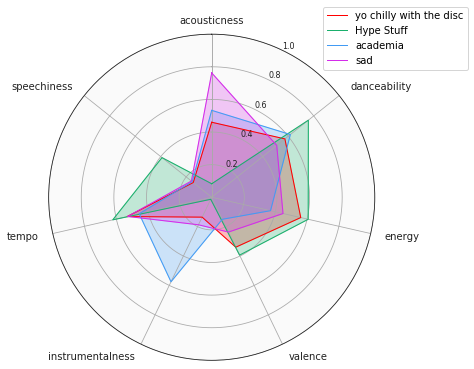

In [238]:
for playlist in plists:
    print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––")
    print(playlist)
    for feature in plists[playlist]:
        if feature != 'name' and feature != 'track uri':
            print(feature.upper(), "| median:", np.median(plists[playlist][feature]), "| mean:", np.mean(plists[playlist][feature]))
    
import matplotlib.pyplot as plt
# Let's look at the 1970 Chevy Impala and plot it.
# values = final_df.loc['chevrolet impala 1970'].tolist()
playlist = 'yo chilly with the disc'
labels = ['acousticness', 'danceability', 'energy', 'valence', 'instrumentalness', 'tempo', 'speechiness']
values = [np.median(plists[playlist]['acousticness']), np.median(plists[playlist]['danceability']), np.median(plists[playlist]['energy']), 
          np.median(plists[playlist]['valence']), np.mean(plists[playlist]['instrumentalness']), np.median(plists[playlist]['tempo']), np.median(plists[playlist]['speechiness'])]
values[-2] = values[-2]/220
values[-1] = values[-1]*4
print(values)

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
values += values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw the outline of our data.
ax.plot(angles, values, color='red', linewidth=1, label=playlist)
# Fill it in.
ax.fill(angles, values, color='red', alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')
    
ax.set_ylim(0, 1)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Helper function to plot each car on the radar chart.
def add_to_radar(playlist, color):
    values = [np.median(plists[playlist]['acousticness']), np.median(plists[playlist]['danceability']), np.median(plists[playlist]['energy']),
              np.median(plists[playlist]['valence']), np.mean(plists[playlist]['instrumentalness']), np.median(plists[playlist]['tempo']), np.median(plists[playlist]['speechiness'])]
    values[-2] = values[-2]/220
    values[-1] = values[-1]*4
    print(values)
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, label=playlist)
    ax.fill(angles, values, color=color, alpha=0.25)

# # Add each car to the chart.
add_to_radar('Hype Stuff', '#1aaf6c')
add_to_radar('academia', '#429bf4')
add_to_radar('sad', '#d42cea')
# add_to_radar('Green Light', '#d42cea')
# add_to_radar('Royals', '#de326b')
# add_to_radar('Liability', '#d66502')

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Lastly, give the chart a title and give it some
# padding above the "Acceleration" label.
#ax.set_title('42 - Mumford and Sons', y=1.08)

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))


In [137]:
#Extract Artist's uri
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:4oCGmYsAQOWt2ACWTpNUU6',
 'spotify:album:6tBpgZG9bV76nSuiz42RbA',
 'spotify:album:2B87zXm9bOWvAJdkJBTpzF',
 'spotify:album:0RprDFd8KN06rt0jyKXBsC',
 'spotify:album:2nPokmAvYy5qYO4rFU7ZDm',
 'spotify:album:0rmhjUgoVa17LZuS8xWQ3v',
 'spotify:album:6rnzvZhe3PA57xKcKLRtJ6']

In [138]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
        spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])
        
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album Melodrama songs has been added to spotify_albums dictionary
Album Melodrama songs has been added to spotify_albums dictionary
Album Melodrama songs has been added to spotify_albums dictionary
Album Melodrama songs has been added to spotify_albums dictionary
Album Pure Heroine songs has been added to spotify_albums dictionary
Album Pure Heroine songs has been added to spotify_albums dictionary
Album Pure Heroine (Extended) songs has been added to spotify_albums dictionary


In [139]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [140]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 8.23931884765625 seconds


In [141]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

84

In [142]:
import pandas as pd
df = pd.DataFrame.from_dict(dic_df)
print(len(df))
final_df = df.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
final_df.head()

84


,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
11,Melodrama,12,5u64RlrnvvbtNh6R0EMh6o,Homemade Dynamite - REMIX,spotify:track:5u64RlrnvvbtNh6R0EMh6o,0.2290,0.781,0.548,0.000000,0.1270,-4.997,0.0764,106.996,0.175,68
24,Melodrama,1,6ie2Bw3xLj2JcGowOlcMhb,Green Light,spotify:track:6ie2Bw3xLj2JcGowOlcMhb,0.0209,0.594,0.721,0.000009,0.0879,-7.812,0.0957,128.942,0.253,75
25,Melodrama,2,7eElVgPcxDqmgGrSwVFI74,Sober,spotify:track:7eElVgPcxDqmgGrSwVFI74,0.1730,0.796,0.467,0.004110,0.1260,-10.369,0.1810,107.901,0.516,61
26,Melodrama,3,02oAUzv4M0ItuTDy2RT3IT,Homemade Dynamite,spotify:track:02oAUzv4M0ItuTDy2RT3IT,0.2870,0.771,0.431,0.000003,0.0934,-5.423,0.0577,107.047,0.268,62
27,Melodrama,4,5q4BpnMrYEFzLO0dYODj6J,The Louvre,spotify:track:5q4BpnMrYEFzLO0dYODj6J,0.2390,0.664,0.382,0.007490,0.0943,-9.977,0.0470,123.214,0.126,64


In [143]:
final_df.to_csv("/Users/sejaldua/Desktop/DIS/spotify_proj/lorde.csv")


[0.526, 0.49, 0.47, 0.533, 0.7099055555555556]


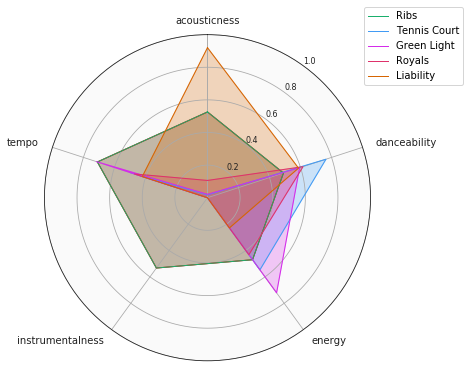

In [155]:
# labels = ['Acceleration', 'Displacement', 'Horsepower', 'MPG', 'Weight']
import matplotlib.pyplot as plt
# Let's look at the 1970 Chevy Impala and plot it.
# values = final_df.loc['chevrolet impala 1970'].tolist()
labels = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'tempo']
new_df = final_df.loc[ : , ['name', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'tempo'] ]
new_df.set_index('name', inplace=True)
new_df.head()
values = new_df.loc['Ribs'].tolist()
values[-1] = values[-1]/180
print(values)

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
values += values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw the outline of our data.
ax.plot(angles, values, color='red', linewidth=1)
# Fill it in.
ax.fill(angles, values, color='red', alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')
    
ax.set_ylim(0, 1)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Helper function to plot each car on the radar chart.
def add_to_radar(song_name, color):
  values = new_df.loc[song_name].tolist()
  values[-1] = values[-1]/180
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=song_name)
  ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar('Ribs', '#1aaf6c')
add_to_radar('Tennis Court', '#429bf4')
add_to_radar('Green Light', '#d42cea')
add_to_radar('Royals', '#de326b')
add_to_radar('Liability', '#d66502')

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Lastly, give the chart a title and give it some
# padding above the "Acceleration" label.
#ax.set_title('42 - Mumford and Sons', y=1.08)

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

In [291]:
import spotipy
import numpy

username='sejaldua'
client_id = '596a6d95b0904fdfa3988f5c7752dd55'
client_secret = '621417cf44204e1da4c97698493a2230'
redirecturi='http://localhost:5000'
thescope='playlist-read-private'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
name = "Mumford And Sons" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

#Extract Artist's uri
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    if sp_albums['items'][i]['name'] not in album_names:
        album_names.append(sp_albums['items'][i]['name'])
        album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
        spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])
        
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album Delta songs has been added to spotify_albums dictionary
Album Wilder Mind songs has been added to spotify_albums dictionary
Album Wilder Mind (Deluxe) songs has been added to spotify_albums dictionary
Album Wilder Mind (Deluxe Version) songs has been added to spotify_albums dictionary
Album Sigh No More (Japanese Deluxe Version) songs has been added to spotify_albums dictionary
Album Babel (Deluxe) songs has been added to spotify_albums dictionary
Album Babel (Gentlemen Of The Road Edition) songs has been added to spotify_albums dictionary
Album The Road To Red Rocks (Live) songs has been added to spotify_albums dictionary
Album Sigh No More (Benelux Edition) songs has been added to spotify_albums dictionary
Album Babel (Deluxe Version) songs has been added to spotify_albums dictionary
Album Sigh No More songs has been added to spotify_albums dictionary
Album Babel songs has been added to spotify_albums dictionary


In [332]:
artist = 'Mumford And Sons'
songs = []
tags = []
albums = []
i = 0
for album in spotify_albums:
    name = spotify_albums[album]['name']
    flag = False
    print(name, end='\n\n')
    for n in name:
        if n not in songs:
            flag = True
            songs.append(n)
            tags.append(i)
        else:
            print('duplicate')
    if flag == True:
        albums.append(spotify_albums[album]['album'][0])
        i+=1


['42', 'Guiding Light', 'Woman', 'Beloved', 'The Wild', 'October Skies', 'Slip Away', 'Rose Of Sharon', 'Picture You', 'Darkness Visible', 'If I Say', 'Wild Heart', 'Forever', 'Delta']

['Tompkins Square Park', 'Believe', 'The Wolf', 'Wilder Mind', 'Just Smoke', 'Monster', 'Snake Eyes', 'Broad-Shouldered Beasts', 'Cold Arms', 'Ditmas', 'Only Love', 'Hot Gates']

['Tompkins Square Park', 'Believe', 'The Wolf', 'Wilder Mind', 'Just Smoke', 'Monster', 'Snake Eyes', 'Broad-Shouldered Beasts', 'Cold Arms', 'Ditmas', 'Only Love', 'Hot Gates', 'Tompkins Square Park - Live', 'Believe - Live', 'The Wolf - Live', 'Snake Eyes - Live']

duplicate
duplicate
duplicate
duplicate
duplicate
duplicate
duplicate
duplicate
duplicate
duplicate
duplicate
duplicate
['Tompkins Square Park', 'Believe', 'The Wolf', 'Wilder Mind', 'Just Smoke', 'Monster', 'Snake Eyes', 'Broad-Shouldered Beasts', 'Cold Arms', 'Ditmas', 'Only Love', 'Hot Gates', 'Tompkins Square Park - Live', 'Believe - Live', 'The Wolf - Live', '

In [333]:
from PyLyrics import *
print(songs)
print(albums)
song_words = []
new_tags = []
new_albums = []
i = 0
print(list(zip(songs, tags)))
for s, t in list(zip(songs, tags)):
    try:
        lyrics = PyLyrics.getLyrics(artist,s)
        words = lyrics.split()
        song_words.append(words)
        print(s, 'finished')
        new_tags.append(t)
        new_albums.append(albums[i])
        i += 1
        print(t)
    except:
        print(s, 'exception')
        continue
tags = new_tags
albums = new_albums
print(tags)
print(albums)
        


['42', 'Guiding Light', 'Woman', 'Beloved', 'The Wild', 'October Skies', 'Slip Away', 'Rose Of Sharon', 'Picture You', 'Darkness Visible', 'If I Say', 'Wild Heart', 'Forever', 'Delta', 'Tompkins Square Park', 'Believe', 'The Wolf', 'Wilder Mind', 'Just Smoke', 'Monster', 'Snake Eyes', 'Broad-Shouldered Beasts', 'Cold Arms', 'Ditmas', 'Only Love', 'Hot Gates', 'Tompkins Square Park - Live', 'Believe - Live', 'The Wolf - Live', 'Snake Eyes - Live', 'Sigh No More', 'The Cave', 'Winter Winds', 'Roll Away Your Stone', 'White Blank Page', 'I Gave You All', 'Little Lion Man', 'Timshel', 'Thistle & Weeds', 'Awake My Soul', 'Dust Bowl Dance', 'After The Storm', 'Hold On To What You Believe', 'Untitled', 'To Darkness', "Sigh No More - Live At Shepherd's Bush Empire", "Winter Winds - Live At Shepherd's Bush Empire", "Roll Away Your Stone - Live At Shepherd's Bush Empire", "White Blank Page - Live At Shepherd's Bush Empire", "I Gave You All - Live At Shepherd's Bush Empire", "Awake My Soul - Live 

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


42 finished
0
Guiding Light finished
0
Woman finished
0
Beloved finished
0
The Wild finished
0
October Skies finished
0
Slip Away finished
0
Rose Of Sharon finished
0
Picture You finished
0
Darkness Visible finished
Darkness Visible exception
If I Say finished
If I Say exception
Wild Heart finished
Wild Heart exception
Forever finished
Forever exception
Delta finished
Delta exception
Tompkins Square Park finished
Tompkins Square Park exception
Believe finished
Believe exception
The Wolf finished
The Wolf exception
Wilder Mind finished
Wilder Mind exception
Just Smoke finished
Just Smoke exception
Monster finished
Monster exception
Snake Eyes finished
Snake Eyes exception
Broad-Shouldered Beasts finished
Broad-Shouldered Beasts exception
Cold Arms finished
Cold Arms exception
Ditmas finished
Ditmas exception
Only Love finished
Only Love exception
Hot Gates finished
Hot Gates exception
Tompkins Square Park - Live exception
Believe - Live exception
The Wolf - Live exception
Snake Eyes - L

In [343]:
import re
import nltk
import os
import wordcloud
import matplotlib.pylab as plt
from collections import Counter

# Get a list of stopwords from nltk
stopwords = nltk.corpus.stopwords.words("english")

def get_clean_words(words):
    def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False
        
    # Set words to lowercase and remove them if they are stop words
    words = [w.lower() for w in words if w.lower() not in stopwords]
    
    # Removes words in parentheses and apostrophes
    words = [w for w in words if w.find('(') == -1 and w.find(')') == -1 and w.find('?') == -1 and w.find('\'') == -1]
    
    # Remove commas
    words = [w.replace(',', '') for w in words]

    # Remove numbers
    words = [w for w in words if not _isnum(w)]
    
    return words
    
    
def word_count(text):
    return Counter(text.split())

corpus = {}
word_counts = []
for t in tags:
    corpus[t] = []
for s, t in list(zip(song_words, tags)):
    clean_words = get_clean_words(s)
    corpus[t].append(' '.join(clean_words))
for t in corpus:
    corpus[t] = ''.join(corpus[t])

with open('mumford.csv', 'w') as f:
    for key in corpus.keys():
        my_dict = word_count(corpus[key])
        for k in my_dict.keys():
            f.write("%s,%s,%s\n"%(albums[key],k,my_dict[k]))
    
 

In [344]:
print(tags)
print(albums)
print(corpus)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 8]
['Delta', 'Wilder Mind', 'Wilder Mind (Deluxe)', 'Sigh No More (Japanese Deluxe Version)', 'Babel (Deluxe)', 'Babel (Gentlemen Of The Road Edition)', 'The Road To Red Rocks (Live)', 'Sigh No More (Benelux Edition)', 'Babel']
{0: 'turn choice presume much sure need darkest turns last hope would see sign oh would see sign well running ashes left forgiveness speaks forget stain need darkest turns time wanna see sign oh would see sign give us sign need guiding light children darkness ohday permanent red glaze eyes heard voice distance caught surprise know claim alright fix eyes guess swear see dawn well know line sit folded hands become blind even star sight always guiding light relate youth well still awe discover new truth always wrapped around slip away night hurl words high well know line sit folded hands become blin

<Figure size 864x1296 with 0 Axes>

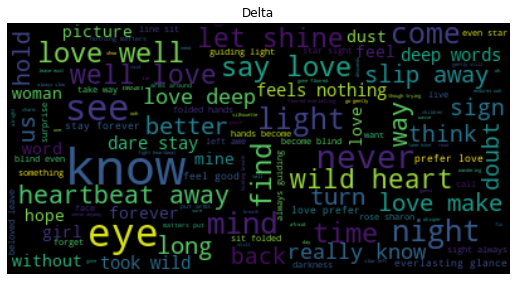

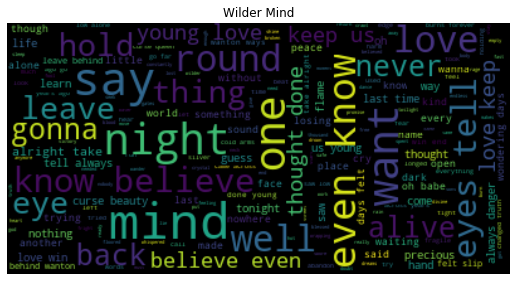

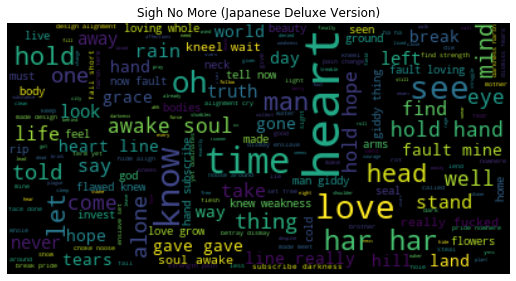

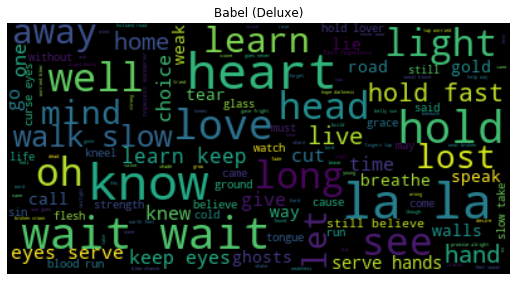

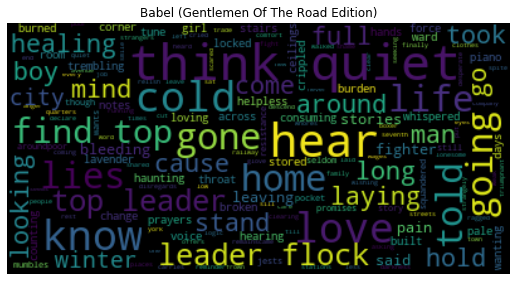

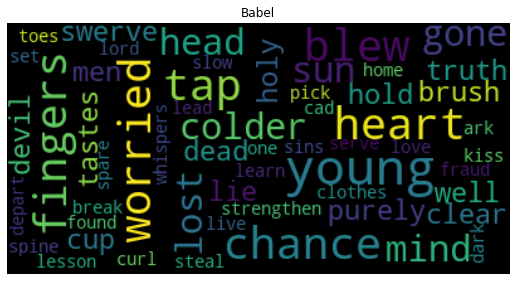

In [347]:
plt.figure(figsize=(12, 18))
i = 0
for t in corpus:
#     print(t)
#     plt.subplot(len(corpus.keys()), 1, i+1)
    fig = plt.figure(figsize=(9, 6))
    plt.title(albums[t])
    wc = wordcloud.WordCloud(max_font_size=40).generate(corpus[t])
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    fig.savefig(albums[t] + '.png')
    i += 1
plt.show()

In [392]:
import spotipy
import numpy

username='sejaldua'
client_id = '596a6d95b0904fdfa3988f5c7752dd55'
client_secret = '621417cf44204e1da4c97698493a2230'
redirecturi='http://localhost:5000'
thescope='playlist-read-private'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

import re
import nltk
import os
import wordcloud
import matplotlib.pylab as plt
from collections import Counter

# Get a list of stopwords from nltk
stopwords = nltk.corpus.stopwords.words("english")

def get_clean_words(words):
    def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False
        
    # Set words to lowercase and remove them if they are stop words
    words = [w.lower() for w in words if w.lower() not in stopwords]
    
    # Removes words in parentheses and apostrophes
    words = [w for w in words if w.find('(') == -1 and w.find(')') == -1 and w.find('?') == -1 and w.find('\'') == -1]
    
    # Remove commas
    words = [w.replace(',', '') for w in words]

    # Remove numbers
    words = [w for w in words if not _isnum(w)]
    
    return words
    
    
def word_count(text):
    return Counter(text.split())


def get_lyrics_for_playlist(uri):
    playlist_id = uri.split(':')[2]
    results = sp.user_playlist(username, playlist_id)
    lyrics = ""
    count = 0
    for track in results['tracks']['items']:
        #print(json.dumps(track, indent=4))
        song_name = track['track']['name']
        artist = track['track']['album']['artists'][0]['name']
        print(song_name, "|", artist)
        try:
            lyrics += PyLyrics.getLyrics(artist,song_name)
            print("finished")
            count += 1
        except:
            print("exception")
            continue
    
    words = get_clean_words(lyrics.split()) 
    print(count, "successfully scraped")
    return words

#Punk Rock Classics
uri = 'spotify:playlist:3zl5C2k16lCsno1i2XcSCM'
words = get_lyrics_for_playlist(uri)
#Pop Classics
uri2 = 'spotify:playlist:55OXRZi5CH4pRD6YA8vrY2'
words2 = get_lyrics_for_playlist(uri2)



Basket Case | Green Day


/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


finished
Wake Me up When September Ends | Green Day
finished
War All The Time | Thursday
finished
Anthem of Our Dying Day | Story Of The Year
finished
Until the Day I Die | Story Of The Year
finished
The Taste of Ink | The Used
finished
Prelude 12/21 | AFI
finished
The Drug In Me Is You | Falling In Reverse
finished
Face Down | The Red Jumpsuit Apparatus
finished
I Write Sins Not Tragedies | Panic! At The Disco
finished
Nine in the Afternoon - Single Mix | Panic! At The Disco
exception
Little Things | Good Charlotte
finished
Girls & Boys | Good Charlotte
finished
The Anthem | Good Charlotte
finished
Lifestyles of the Rich & Famous | Good Charlotte
finished
Welcome to the Black Parade | My Chemical Romance
finished
Boom - 2006 Remaster | P.O.D.
exception
Youth of the Nation | P.O.D.
finished
Forget My Name | New Found Glory
finished
My Friends Over You | New Found Glory
finished
In Too Deep | Sum 41
finished
Trouble | Never Shout Never
finished
Addicted | Simple Plan
finished
Nobody's L

In [394]:
from afinn import Afinn

afinn = Afinn()

words_list = [words, words2]
playlists = ['Punk Rock', 'Mood Booster']
print(words_list)
def word_count(text):
    return Counter(text.split())

with open('genre_comparison.csv', 'w') as f:
    i = 0
    for w in words_list:
        my_dict = word_count(' '.join(w))
        for key in my_dict.keys():
            f.write("%s,%s,%s,%s\n"%(playlists[i],key,my_dict[key],str(afinn.score(key))))
        i += 1

[['time', 'listen', 'whine', 'everything', 'one', 'melodramatic', 'fools', 'neurotic', 'bone', 'doubt', 'sometimes', 'give', 'creeps', 'sometimes', 'mind', 'plays', 'tricks', 'keeps', 'up', 'think', 'paranoid', 'went', 'shrink', 'analyze', 'dreams', 'says', 'lack', 'sex', 'went', 'whore', 'said', 'bore', 'quit', 'whining', 'sometimes', 'give', 'creeps', 'sometimes', 'mind', 'plays', 'tricks', 'keeps', 'up', 'think', 'yeah', 'yeah', 'yeah', 'go', 'go', 'grasping', 'control', 'better', 'hold', 'sometimes', 'give', 'creeps', 'sometimes', 'mind', 'plays', 'tricks', 'keeps', 'up', 'think', 'paranoid', 'come', 'passed', 'innocent', 'never', 'last', 'wake', 'september', 'ends', 'like', 'come', 'pass', 'seven', 'years', 'gone', 'fast', 'wake', 'september', 'ends', 'comes', 'rain', 'again', 'falling', 'stars', 'drenched', 'pain', 'again', 'becoming', 'memory', 'rests', 'never', 'forgets', 'lost', 'wake', 'september', 'ends', 'summer', 'come', 'passed', 'innocent', 'never', 'last', 'wake', 'sept